# Module 6 - Clustering for Diverse portfolio analysis

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd

stocks_l = [f for f in listdir('./Stocks') if isfile(join('./Stocks', f))]
stocks = pd.DataFrame()

for i in stocks_l:
    df = pd.read_csv('Stocks/'+i)
    df = df[df.Series == 'EQ']
    stocks[i] = df['Close Price']

### Query 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [2]:
volatility_and_return = []
for i in stocks.tail(365).columns:
    l = [(stocks[i].pct_change() * 100).std() * (252**0.2)]
    l += [(stocks[i].pct_change() * 100).mean() * 252]
    volatility_and_return.append(l)

### Query 6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

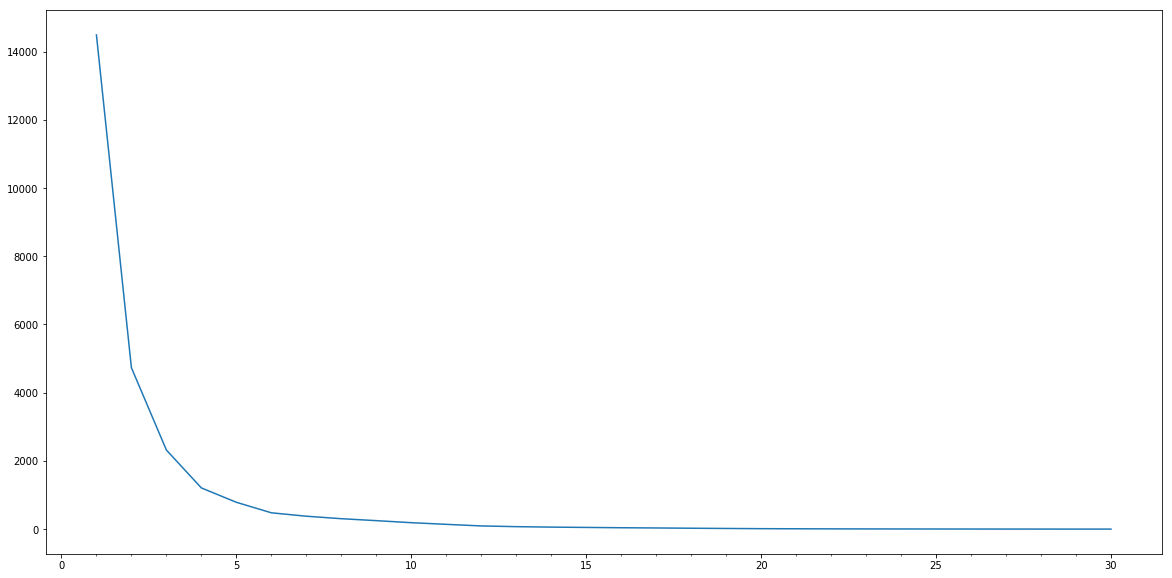

In [5]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

x,y = zip(*volatility_and_return)

inertia = []

for i in range(1,len(x)+1):
    model = KMeans(n_clusters = i)
    model.fit(volatility_and_return)
    inertia.append(model.inertia_)

fig,ax = plt.subplots(figsize=(20,10))
plt.plot(range(1,len(x)+1),inertia)
ax.set_xticks(range(1,len(x)+1),2)
plt.show()

#Optimum number of clusters = 4

### Query 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster 

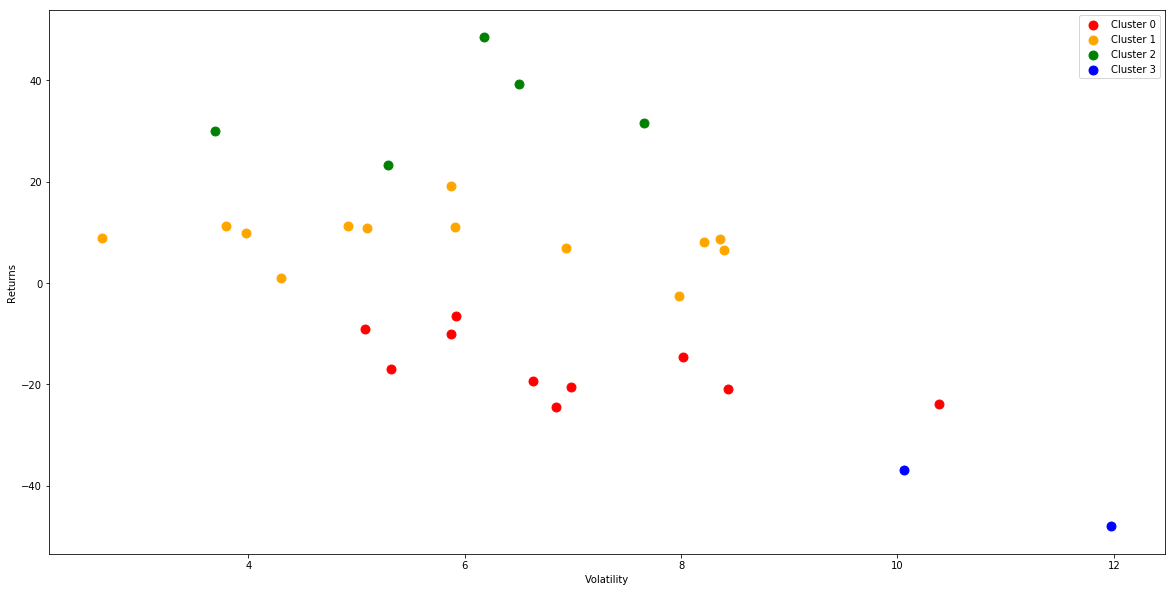

,Stocks,Volatility,Returns,Cluster
0,HINDUNILVR,3.693801,29.937804,2
1,RAYMOND,6.932280,7.014426,1
2,ASIANPAINT,3.982852,9.794022,1
3,MINDTREE,6.499929,39.255810,2
4,VOLTAS,5.868954,19.101722,1
5,AXISBANK,5.290485,23.319431,2
6,TITAN,6.182386,48.590308,2
7,JKLAKSHMI,5.318381,-16.894329,0
8,BERGEPAINT,5.094645,10.892445,1
9,RBLBANK,4.924468,11.348562,1


In [4]:
model = KMeans(n_clusters = 4)
model.fit(volatility_and_return)
labels = model.predict(volatility_and_return)

df = pd.DataFrame()
df['Stocks'] = [i.strip('.csv') for i in stocks_l]
df['Volatility'] = x
df['Returns'] = y 
df['Cluster'] = labels

colors = {0:'red',1:'orange',2:'green',3:'blue'}


fig,ax = plt.subplots(figsize=(20,10))
for i in range(4):
    xn,yn = zip(*[[x[j],y[j]] for j in range(len(x)) if labels[j] == i])
    plt.scatter(xn,yn,s=80,c=colors[i],label='Cluster '+str(i))
    
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend()
plt.show()

df